## Step 1: Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 2: Load Dataset from Google Drive

In [ ]:
import pandas as pd
import os

DATA_PATH = "/content/drive/MyDrive/Work Project/NLP assessment"

train_file = os.path.join(DATA_PATH, "twitter_training.csv")
val_file = os.path.join(DATA_PATH, "twitter_validation.csv")

train_df = pd.read_csv(train_file, header=None)
val_df = pd.read_csv(val_file, header=None)

train_df.columns = ["id", "entity", "sentiment", "tweet"]
val_df.columns = ["id", "entity", "sentiment", "tweet"]

print(train_df.shape, val_df.shape)
train_df.head()

(74683, 4) (1001, 4)


,id,entity,sentiment,tweet
0,tweet_id,tweet_concept,tweet_sentiment,tweet
1,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
3,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
4,2401,Borderlands,Positive,im coming on borderlands and i will murder you...


## Step 3: Data Cleaning & Preprocessing

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Added to fix the LookupError

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

train_df["clean_tweet"] = train_df["tweet"].apply(clean_text)
val_df["clean_tweet"] = val_df["tweet"].apply(clean_text)

train_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,id,entity,sentiment,tweet,clean_tweet
0,tweet_id,tweet_concept,tweet_sentiment,tweet,tweet
1,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderlands murder
2,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
3,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
4,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder


## Step 4: Tokenization & TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

X_train = tfidf.fit_transform(train_df["clean_tweet"])
X_val = tfidf.transform(val_df["clean_tweet"])

y_train = train_df["sentiment"]
y_val = val_df["sentiment"]

print(X_train.shape)

(74683, 5000)


# Step 5: Train Multiple Machine Learning Models

## i) Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, svm_pred)
print("SVM Accuracy:", svm_acc)
print(classification_report(y_val, svm_pred))


SVM Accuracy: 0.8201798201798202
                  precision    recall  f1-score   support

 tweet_sentiment       0.00      0.00      0.00         1
      Irrelevant       0.77      0.76      0.76       172
        Negative       0.78      0.90      0.83       266
         Neutral       0.90      0.75      0.82       285
        Positive       0.83      0.86      0.85       277

        accuracy                           0.82      1001
       macro avg       0.66      0.65      0.65      1001
    weighted avg       0.82      0.82      0.82      1001



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## ii) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_val)

dt_acc = accuracy_score(y_val, dt_pred)
print("Decision Tree Accuracy:", dt_acc)
print(classification_report(y_val, dt_pred))


Decision Tree Accuracy: 0.948051948051948
                  precision    recall  f1-score   support

 tweet_sentiment       0.00      0.00      0.00         1
      Irrelevant       0.94      0.96      0.95       172
        Negative       0.97      0.96      0.96       266
         Neutral       0.98      0.93      0.95       285
        Positive       0.91      0.95      0.93       277

        accuracy                           0.95      1001
       macro avg       0.76      0.76      0.76      1001
    weighted avg       0.95      0.95      0.95      1001



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## iii) Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_val)

rf_acc = accuracy_score(y_val, rf_pred)
print("Random Forest Accuracy:", rf_acc)
print(classification_report(y_val, rf_pred))


Random Forest Accuracy: 0.964035964035964
                  precision    recall  f1-score   support

 tweet_sentiment       0.00      0.00      0.00         1
      Irrelevant       0.97      0.97      0.97       172
        Negative       0.96      0.98      0.97       266
         Neutral       0.98      0.95      0.97       285
        Positive       0.95      0.97      0.96       277

        accuracy                           0.96      1001
       macro avg       0.77      0.77      0.77      1001
    weighted avg       0.96      0.96      0.96      1001



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## iv) Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_val)

nb_acc = accuracy_score(y_val, nb_pred)
print("Naive Bayes Accuracy:", nb_acc)
print(classification_report(y_val, nb_pred))


## Step 6: Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [0.1, 1, 10]}
svm = LinearSVC()

grid = GridSearchCV(svm, param_grid, cv=3, scoring="accuracy")
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
best_model = grid.best_estimator_

y_pred_best = best_model.predict(X_val)
print(classification_report(y_val, y_pred_best))

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Params: {'C': 0.1}
                  precision    recall  f1-score   support

 tweet_sentiment       0.00      0.00      0.00         1
      Irrelevant       0.76      0.62      0.69       172
        Negative       0.71      0.88      0.79       266
         Neutral       0.86      0.69      0.77       285
        Positive       0.77      0.85      0.81       277

        accuracy                           0.77      1001
       macro avg       0.62      0.61      0.61      1001
    weighted avg       0.78      0.77      0.77      1001



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Step 7: Model Evaluation & Metrics

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

acc = accuracy_score(y_val, y_pred_best)
print("Final Accuracy:", acc)

Final Accuracy: 0.7722277722277723


## Step 8: Visualization

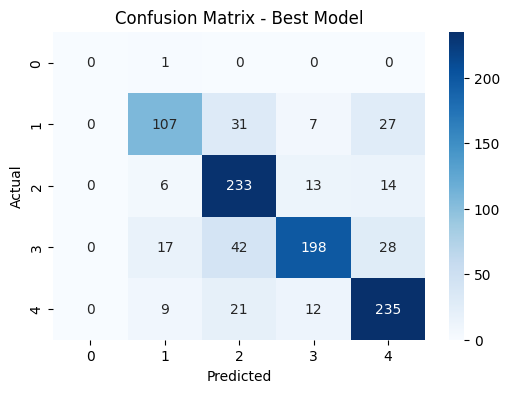

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_val, y_pred_best)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Best Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Step 9: Model Comparison Graph

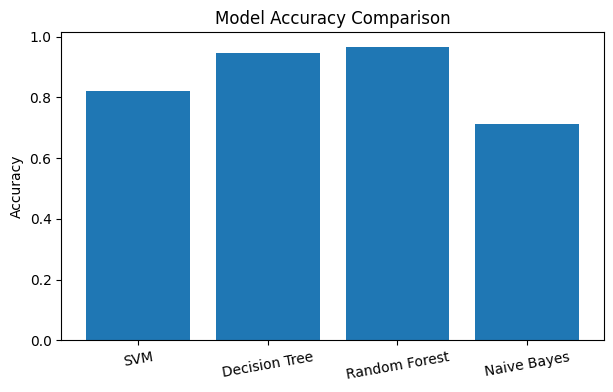

In [ ]:
plt.figure(figsize=(7,4))
plt.bar(results.keys(), results.values())
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=10)
plt.show()

## Step 10: Final Best Model Selection

In [ ]:
best_algo = max(results, key=results.get)
print("Best Algorithm:", best_algo)
print("Accuracy:", results[best_algo])

Best Algorithm: Random Forest
Accuracy: 0.9660339660339661
